In [11]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score , KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.calibration import CalibratedClassifierCV
from sklearn.decomposition import PCA


In [12]:
# Training set
df = pd.read_csv('/home/amal/Téléchargements/train1.csv')

print(df.isnull().values.sum().sum())  # check if any value is Null in DataFrame

attribus = df.drop('id', axis=1)
attribus = df.drop('target', axis=1)
classe = df.target.values




0


In [4]:
#X_train, X_test, y_train, y_test = train_test_split( attribus, classe, test_size=0.1, random_state=0)

In [ ]:
#Tree-based estimators (see the sklearn.tree module and forest of trees in the sklearn.ensemble module) can be used to compute feature importances, which in turn can be used to discard irrelevant features

rfe = RandomForestClassifier()
rfe.fit(attribus, classe)
rfe.feature_importances_  
model = SelectFromModel(rfe, prefit=True)
X_new = model.transform(attribus)
X_new.shape 

In [13]:
#21 first select from model gives 21
#Pca
pca = PCA(n_components=21)
pca.fit(attribus)
attribus = pca.fit_transform(attribus)
attribus.shape

(61878, 21)

In [263]:
#https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

#Cross validation for estimate the number of max features in random forrest   
max_features = [3 , 4  , 5, 10, 15 ]
k_scores = []
k_scores1 = []
k_scores2 = []
for feature in max_features:
    rf = RandomForestClassifier(max_features=feature)
    scores = cross_val_score(rf, attribus,classe,  cv=10, scoring = 'accuracy')
    scores1 = cross_val_score(rf, attribus,classe,  cv=10, scoring = 'precision_micro')
    scores2 = cross_val_score(rf, attribus,classe,  cv=10, scoring = 'recall_micro')
    k_scores.append(scores.mean())
    k_scores1.append(scores1.mean())
    k_scores2.append(scores2.mean())
print k_scores
print k_scores1
print k_scores2


                       




[0.94451641751282323, 0.94015417998339257, 0.94062373756031215, 0.91410008312364366, 0.90584411401855791]
[0.94378966328754266, 0.93931434742074738, 0.93695363446623836, 0.91468380574643893, 0.90629722720587957]
[0.94408011277150705, 0.9378409533349672, 0.93024316578356603, 0.91386091458575469, 0.90592528651328286]


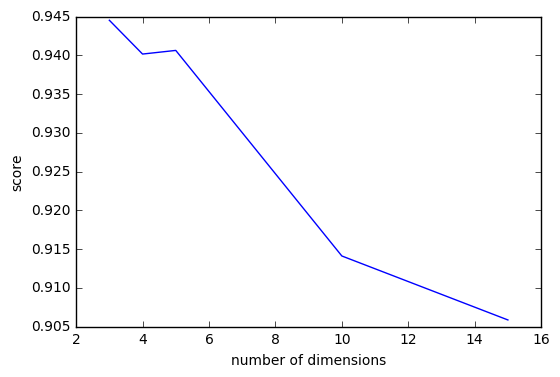

In [264]:
#ACCUARCY
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(max_features ,k_scores)
plt.xlabel ('number of dimensions')
plt.ylabel('score')

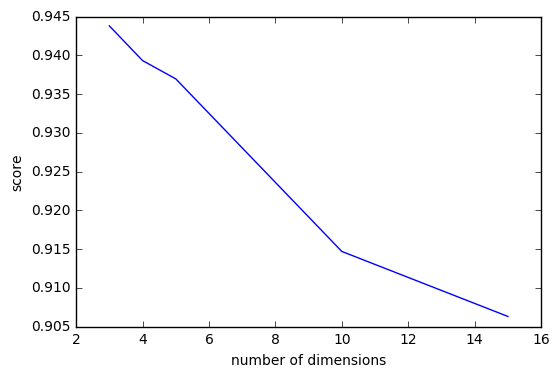

In [265]:
# precision
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(max_features ,k_scores1)
plt.xlabel ('number of dimensions')
plt.ylabel('score')

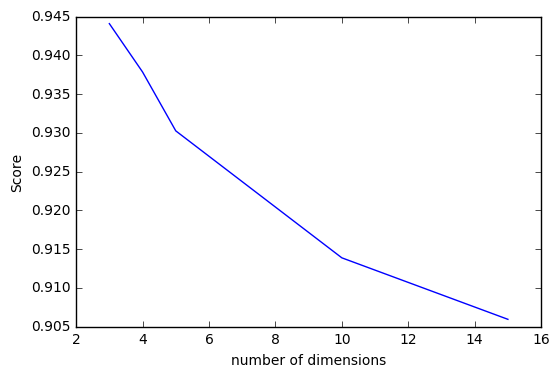

In [266]:
#Rappel
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(max_features ,k_scores2)
plt.xlabel ('number of dimensions')
plt.ylabel('Score')

In [268]:
#rf.fit(X_train, y_train) # fit the data to the algorithm
#1.b. n_estimators :
#This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value
#as your processor can handle because this makes your predictions stronger and more stable.

# FIt our model and test it
rfe = RandomForestClassifier(n_estimators=800, max_features=3)
rfe.fit(attribus, classe)
print("score d'entrainement:", rfe.score(attribus,classe))
scores = cross_val_score(rfe, attribus,classe,  cv=10, scoring = 'accuracy')
print scores.mean()

("score d'entrainement:", 1.0)
0.95141498061


In [29]:
#rf.fit(X_train,y_train,)
#dec = rf.predict(X_test)
#print (' accuracy is ' , accuracy_score(y_test,dec))

#print(rf.score(X_test, y_test))

In [ ]:
#https://www.kaggle.com/c/otto-group-product-classification-challenge/forums/t/14205/calibratedclassifiercv-for-random-forest
#Test step
df1 = pd.read_csv('/home/amal/Téléchargements/test.csv')
test_data = df1.as_matrix()
test_data = np.delete(test_data, 0 , axis=1)
test_data = pca.fit_transform(test_data)
test_data.shape
calibrated = CalibratedClassifierCV(rfe, method='sigmoid')
calibrated.fit(attribus, classe)
prediction = calibrated.predict_proba(test_data)

#print 'predict result is:'
#print (prediction)
#print(prediction.shape)

In [270]:
#submission format required by kaggle
submission = pd.DataFrame({ "id": df1["id"]})
class_range = range(1, 10)
i = 0

for num in class_range:
    col_name = str("Class_{}".format(num))
    submission[col_name] = prediction[:,i]
    i = i + 1  
submission.to_csv('/home/amal/Bureau/result_random_forrest.csv', index=False)